# IMPORTING LIBRARIES

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# READING DATA

In [106]:
data=pd.read_csv('C:\\Users\\RAJIV\\Downloads\\ML\\titanic\\train.csv' )

In [107]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
data.shape

(891, 12)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [110]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# DATA VISUALIZATION

C:\Users\RAJIV\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\RAJIV\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


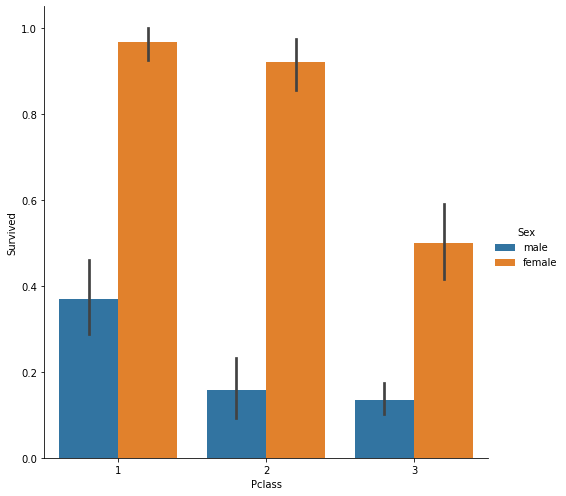

In [111]:
sns.factorplot(x="Pclass" ,y="Survived" ,hue="Sex", data=data, size=7, kind="bar")

***INFERENCE-> We can clearly see that the survival possibility of females are much greater than male in all passenger class .***

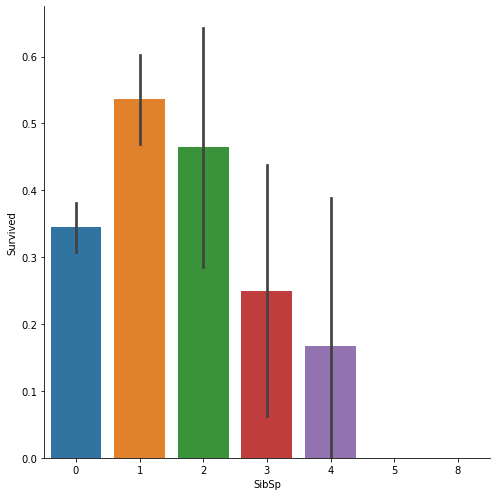

In [112]:
sns.factorplot(x="SibSp" ,y="Survived" , data=data, size=7, kind="bar")

***INFERENCE-> From the above graph we can easily visualize that the persons having more siblings has less chances of survival.***

C:\Users\RAJIV\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


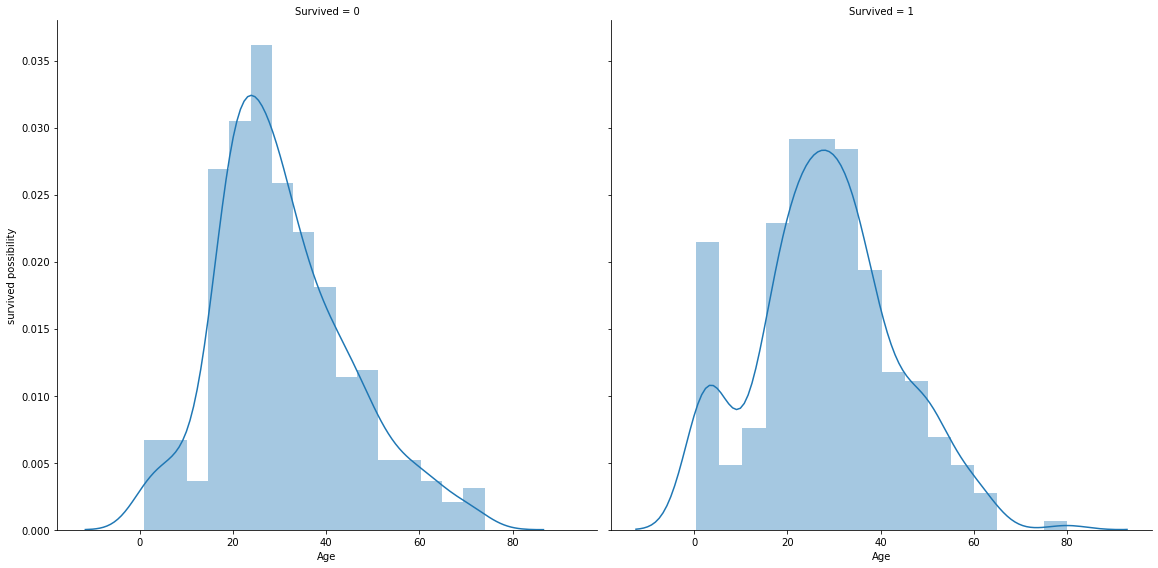

In [113]:
fig=sns.FacetGrid(data,col="Survived",size=8)
fig=fig.map(sns.distplot,"Age")
fig=fig.set_ylabels("survived possibility")

***INFERENCE -> We can see from the above visualization that people who survived are mostly younger people between age 20-40.***

# DATA PREPROCESSING

   ***-> Checking for null or mising values in data***

In [114]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

  ***->> Filling missing values***

In [115]:
age_m=data["Age"].mean()
age_sd=data["Age"].std()
age_slice=data["Age"].copy()

In [116]:
age_rand=np.random.randint(age_m-age_sd,age_m+age_sd,size=data["Age"].isnull().sum())
age_slice[age_slice.isnull()]=age_rand
data["Age"]=age_slice
data["Embarked"]=data["Embarked"].fillna('S')

In [117]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

  ***->> Removing columns which doesn't play any important role in training our model***

In [118]:
cols_t_drop=["PassengerId","Name","Ticket","Cabin"]


In [119]:
data.drop(cols_t_drop, axis=1, inplace=True)

In [120]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,38.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


  ***->> Encoding categorical data as for training our model we need numeric values***

In [121]:
sex_encod={"male":0,"female":1}
data["Sex"]=data["Sex"].map(sex_encod)
data["Embarked"]=data["Embarked"].fillna('S')
embrk={"S":0,"C":1,"Q":2}
data["Embarked"]=data["Embarked"].map(embrk)

In [122]:
data["Embarked"].unique()

array([0, 1, 2], dtype=int64)

In [123]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,38.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


 ***->> Preparing input and output data***

In [124]:
x=data.drop(data.columns[[0]],axis=1)

In [125]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,0
888,3,1,38.0,1,2,23.4500,0
889,1,0,26.0,0,0,30.0000,1


In [126]:
y=data["Survived"]

In [127]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# IMPORTING AND TRAINING OUR MODELS

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [129]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier(n_estimators=200,criterion="entropy")
nb=GaussianNB()
lr=LogisticRegression()


  ***->> Scaling input data to remove baisedness in prediction***

In [130]:
sc=StandardScaler()
x=sc.fit_transform(x)

***->> Splitting input data in training and testing part***

In [241]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)

In [242]:
x_train.shape

(712, 7)

In [243]:
x_test.shape

(179, 7)

In [244]:
dtc.fit(x_train,y_train)
rfc.fit(x_train,y_train)
nb.fit(x_train,y_train)
lr.fit(x_train,y_train)

LogisticRegression()

# PREDICTING OUTPUT AND CALCULATING ACCURACY SCORE USING OUR TRAINED MODEL

In [245]:
de_pred=dtc.predict(x_test)
rf_pred=rfc.predict(x_test)
nb_pred=nb.predict(x_test)
lr_pred=lr.predict(x_test)

In [246]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [247]:
print("accuracy for decision tree is:{}%".format(accuracy_score(y_test,de_pred)*100))
print(classification_report(y_test,de_pred))

accuracy for decision tree is:77.09497206703911%
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       110
           1       0.70      0.71      0.71        69

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [248]:
print("accuracy for random forest is:{}%".format(accuracy_score(y_test,rf_pred)*100))
print(classification_report(y_test,rf_pred))

accuracy for random forest is:83.79888268156425%
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       110
           1       0.82      0.74      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



In [249]:
print("accuracy for naive bayes is:{}%".format(accuracy_score(y_test,nb_pred)*100))
print(classification_report(y_test,nb_pred))

accuracy for naive bayes is:79.3296089385475%
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       110
           1       0.72      0.75      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.79       179



In [250]:
print("accuracy for Logistic Regression is:{}%".format(accuracy_score(y_test,lr_pred)*100))
print(classification_report(y_test,lr_pred))

accuracy for Logistic Regression is:81.00558659217877%
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       110
           1       0.75      0.77      0.76        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

